In [1]:
# for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# for visualization
from matplotlib import pyplot as plt
# to include graphs inline within the frontends next to code
import seaborn as sns

# preprocessing functions and evaluation models
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier

# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier

In [2]:
train = pd.read_csv('ForestCoverType_train.csv')
test = pd.read_csv('ForestCoverType_test.csv')

In [3]:
def outlier_function(df, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [4]:
# loop through all columns to see if there are any outliers
for i in train.columns:
    if outlier_function(train, i)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(train, i)[2], i))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points
There are 3597 outliers in Wilderness_Area1
There are 499 outliers in Wilderness_Area2
There are 355 outliers in Soil_Type1
There are 623 outliers in Soil_Type2
There are 962 outliers in Soil_Type3
There are 843 outliers in Soil_Type4
There are 165 outliers in Soil_Type5
There are 650 outliers in Soil_Type6
There are 1 outliers in Soil_Type8
There are 10 outliers in Soil_Type9
There are 2142 outliers in Soil_Type10
There are 406 outliers in Soil_Type11
There are 227 outliers in Soil_Type12
There are 476 outliers in Soil_Type13
There are 169 outliers in Soil_Type14
There are 114 outliers in Soil_Type16
There are 612 outliers in Soil_Type17
There are 60 outliers in Soil_Type18
There a

In [5]:
train.iloc[:,1:11].describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


In [6]:
for column in ['Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
              'Horizontal_Distance_To_Roadways', 'Horizontal_Distance_To_Fire_Points']:
    train = train[(train[column] > outlier_function(train, column)[0]) & (train[column] < outlier_function(train, column)[1])]

In [7]:
size = 10
Uni = []
for i in range(size + 1, len(train.columns) - 1):
    Uni.append(pd.unique(train[train.columns[i]].values))

In [8]:
Uni

[array([1, 0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([1, 0], dtype=int64),
 array([0, 1], dtype

In [9]:
train.iloc[:, 11:15].sum(axis = 1).sum()

14883

In [10]:
train.iloc[:, 15:55].sum(axis = 1).sum()

14883

C:\Users\PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


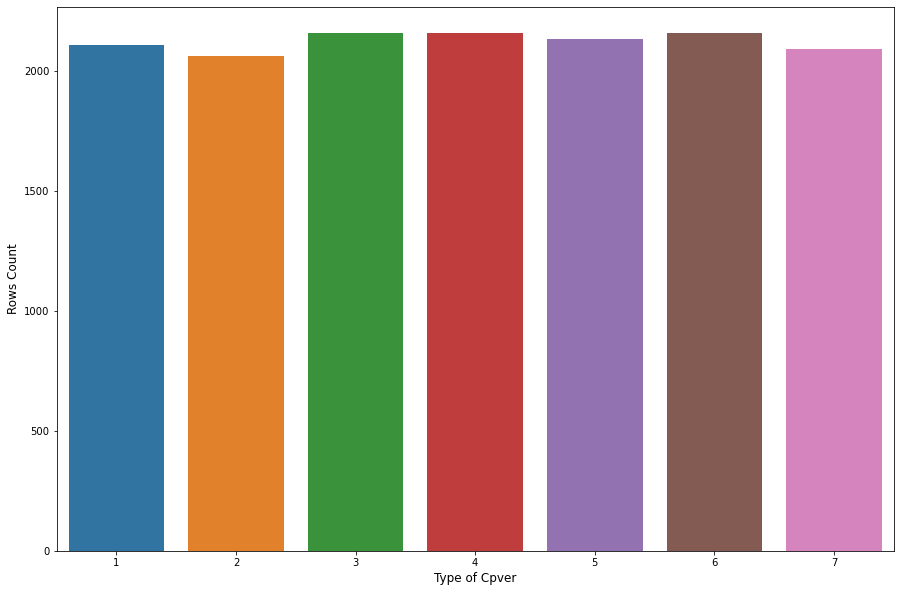

In [11]:
plt.figure(figsize = (15, 10))
sns.countplot(train['Cover_Type'])
plt.xlabel('Type of Cpver', fontsize = 12)
plt.ylabel('Rows Count', fontsize = 12)
plt.show()

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

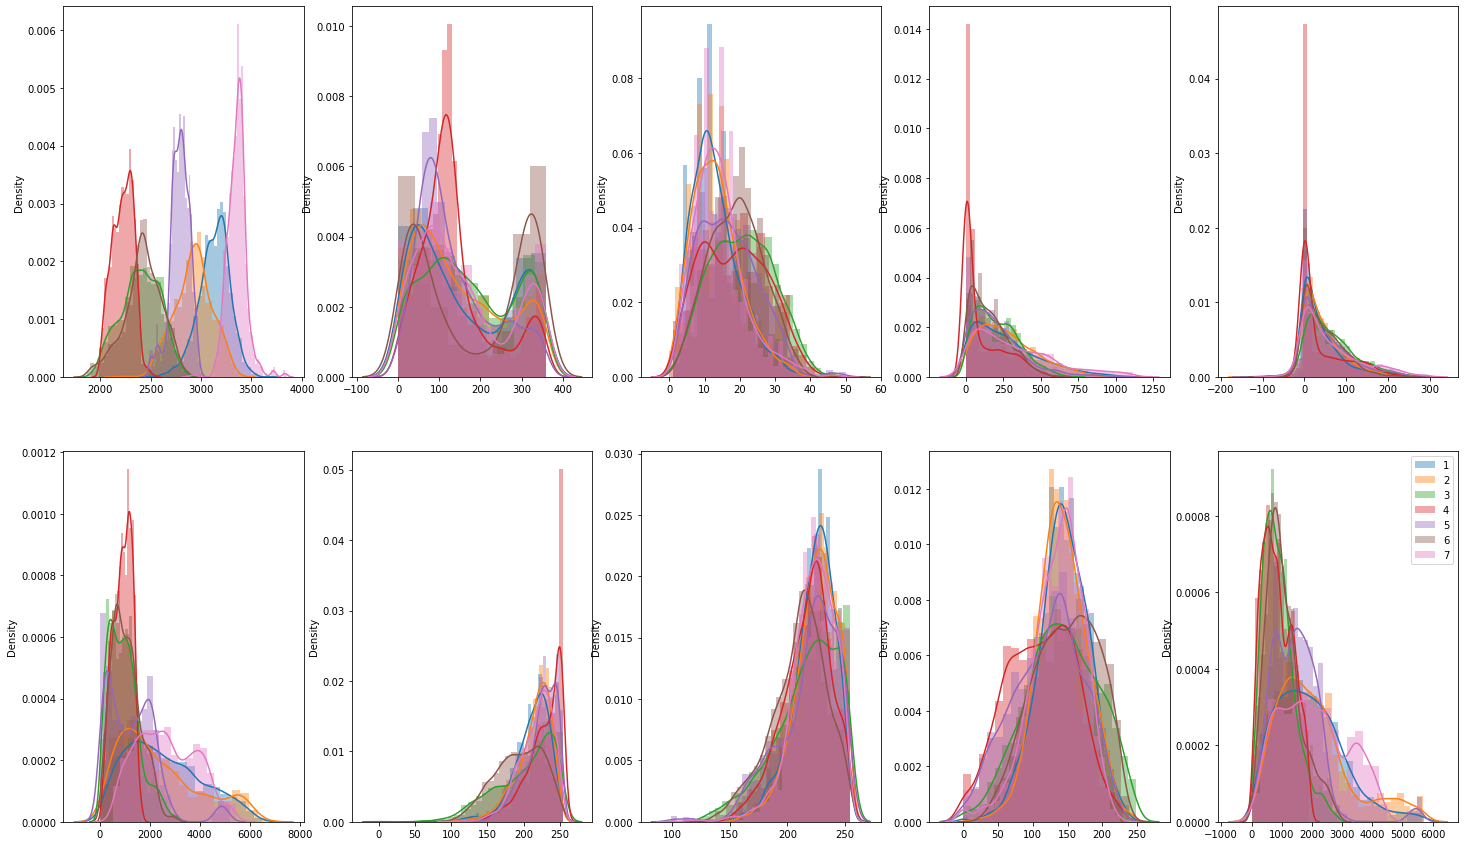

In [12]:
fig, axes = plt.subplots(nrows = 2,ncols = 5,figsize = (25,15))
g= sns.FacetGrid(train, hue='Cover_Type',height=5)
(g.map(sns.distplot,train.columns[1],ax=axes[0][0]))
(g.map(sns.distplot, train.columns[2],ax=axes[0][1]))
(g.map(sns.distplot, train.columns[3],ax=axes[0][2]))
(g.map(sns.distplot, train.columns[4],ax=axes[0][3]))
(g.map(sns.distplot, train.columns[5],ax=axes[0][4]))
(g.map(sns.distplot, train.columns[6],ax=axes[1][0]))
(g.map(sns.distplot, train.columns[7],ax=axes[1][1]))
(g.map(sns.distplot, train.columns[8],ax=axes[1][2]))
(g.map(sns.distplot, train.columns[9],ax=axes[1][3]))
(g.map(sns.distplot, train.columns[10],ax=axes[1][4]))
plt.close(2)
plt.legend()

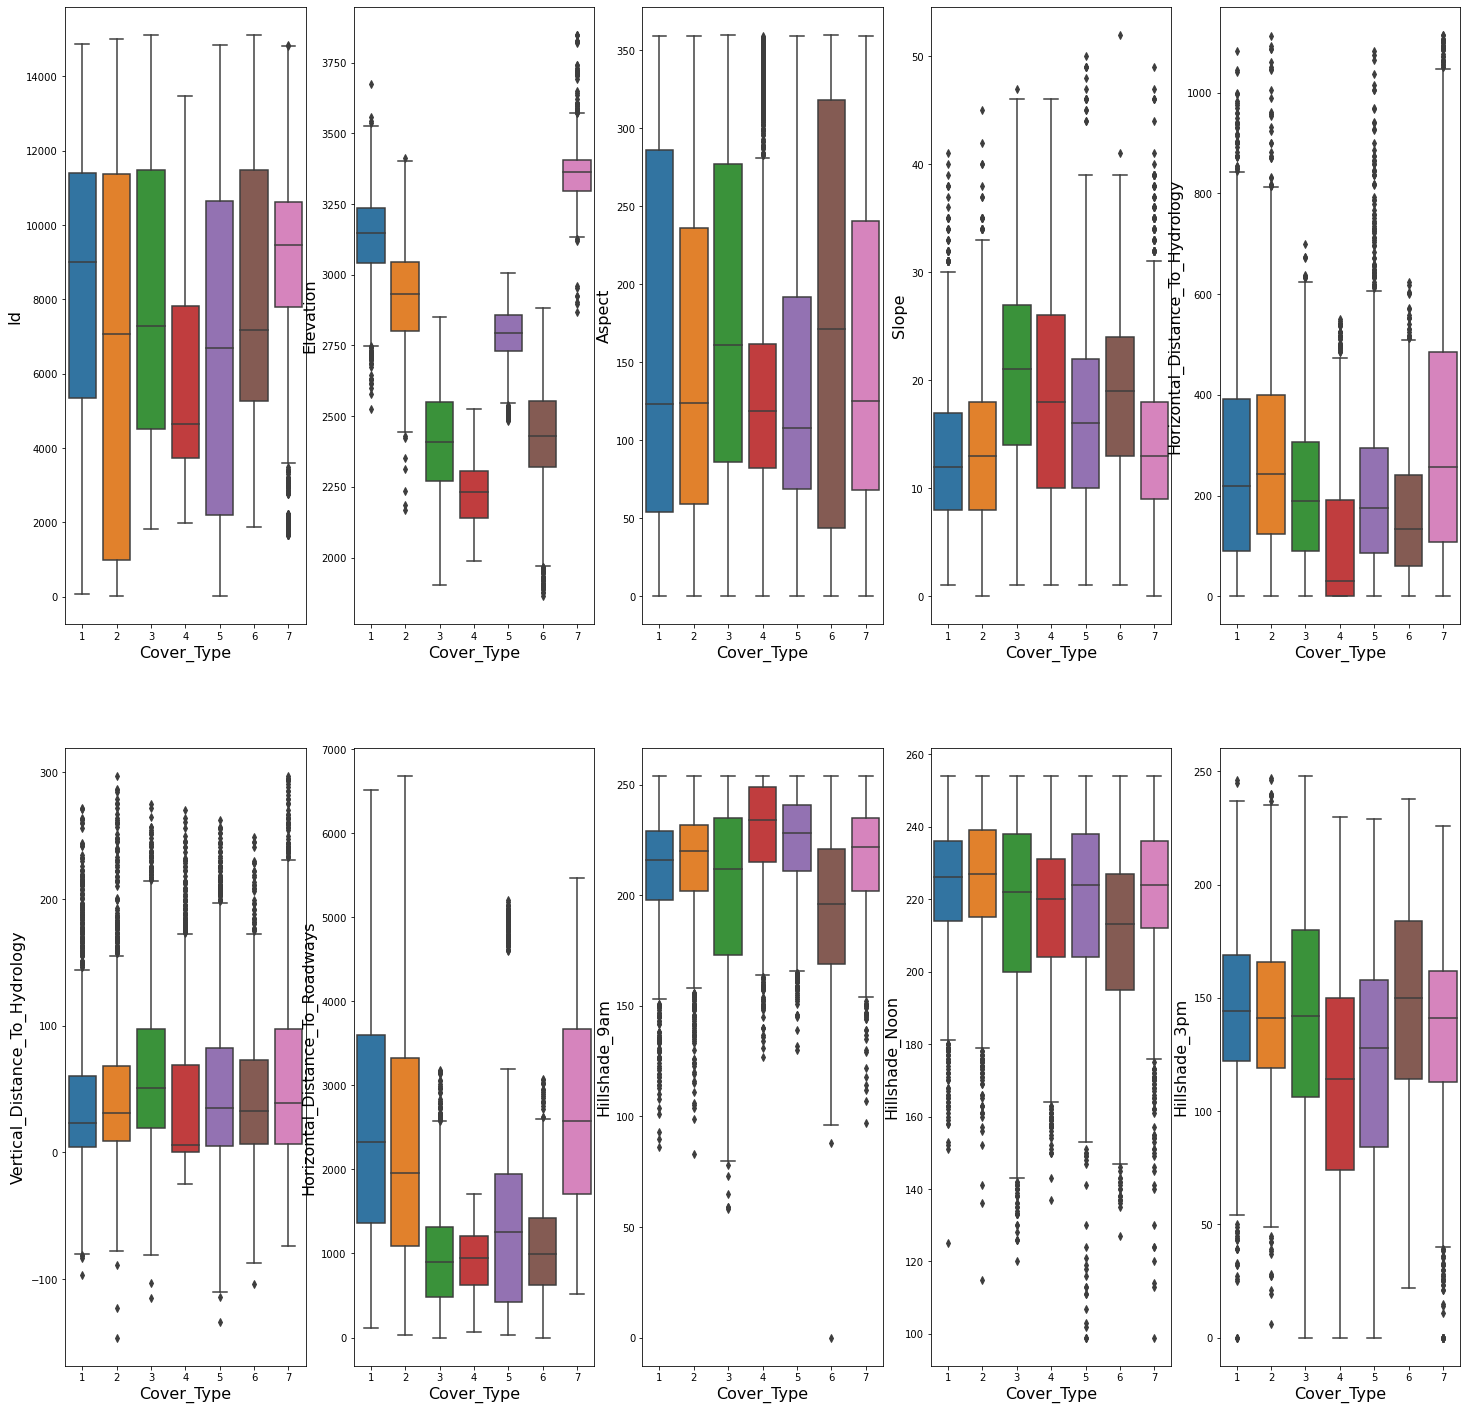

In [39]:
size=10
fig, axes = plt.subplots(nrows = 2,ncols = 5,figsize = (25,25))
for i in range(0,size):
    row = i // 5
    col = i % 5
    ax_curr = axes[row, col]
    sns.boxplot(x="Cover_Type", y=train.columns[i], data=train,ax=ax_curr);
    ax_curr.xaxis.label.set_size(16)
    ax_curr.yaxis.label.set_size(16)
    
fig.set_facecolor((1, 1, 1))


In [14]:
pd.crosstab(train['Soil_Type31'], train['Cover_Type'])

Cover_Type,1,2,3,4,5,6,7
Soil_Type31,,,,,,,
0,1998,1970,2160,2160,2048,2153,2070
1,112,96,0,0,87,7,22


In [15]:
x = train.iloc[:, 15:55]
y = train.iloc[:, 11:15]
y = pd.DataFrame(y)
x = pd.DataFrame(x)
s2 = pd.Series(x.columns[np.where(x != 0)[1]])
s3 = pd.Series(y.columns[np.where(y != 0)[1]])
train['soil_type'] = s2
train['Wilderness_Area'] = s3
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,soil_type,Wilderness_Area
11,12,2886,151,11,371,26,5253,234,240,136,...,0,0,0,0,0,0,0,2,Soil_Type18,Wilderness_Area1
14,15,2503,157,4,67,4,674,224,240,151,...,0,0,0,0,0,0,0,5,Soil_Type18,Wilderness_Area1
15,16,2495,51,7,42,2,752,224,225,137,...,0,0,0,0,0,0,0,5,Soil_Type18,Wilderness_Area1
17,18,2517,72,7,85,6,595,228,227,133,...,0,0,0,0,0,0,0,5,Soil_Type18,Wilderness_Area1
18,19,2504,0,4,95,5,691,214,232,156,...,0,0,0,0,0,0,0,5,Soil_Type29,Wilderness_Area1


In [16]:
df_viz = train.iloc[:, 0:15]
df_viz = df_viz.drop(['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
                     'Wilderness_Area4'], axis = 1)
df_viz.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
11,12,2886,151,11,371,26,5253,234,240,136,4051
14,15,2503,157,4,67,4,674,224,240,151,5600
15,16,2495,51,7,42,2,752,224,225,137,5576
17,18,2517,72,7,85,6,595,228,227,133,5607
18,19,2504,0,4,95,5,691,214,232,156,5572


<AxesSubplot:xlabel='Wilderness_Area'>

<Figure size 1080x720 with 0 Axes>

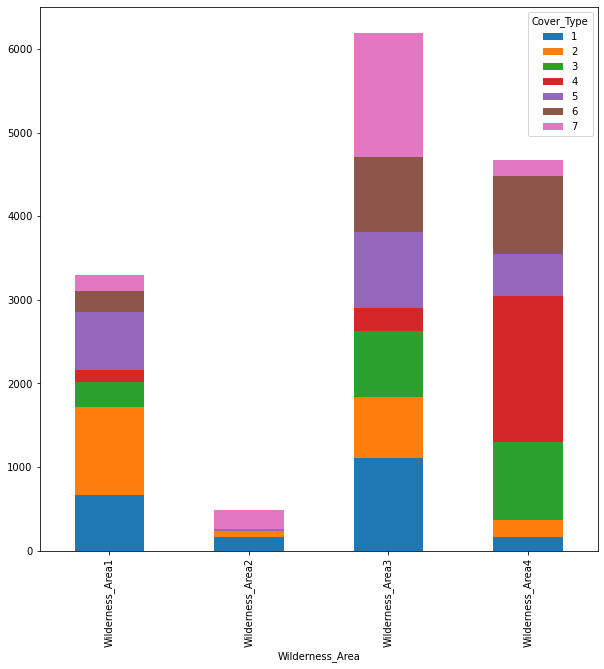

In [17]:
plt.figure(figsize = (15, 10))
pd.crosstab(train['Wilderness_Area'], train['Cover_Type']).plot.bar(figsize = (10, 10), stacked = True)

<AxesSubplot:xlabel='soil_type'>

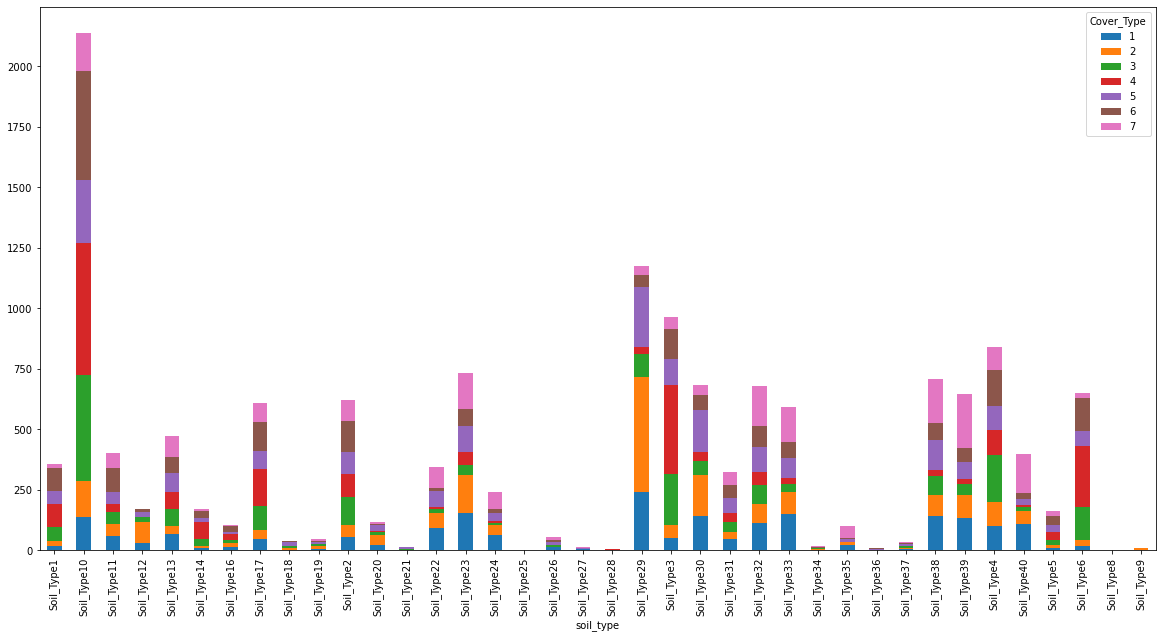

In [18]:
pd.crosstab(train['soil_type'], train['Cover_Type']).plot.bar(figsize = (20, 10), stacked = True)

Text(0.5, 1.0, 'Pearson Correlation of Numeric Features')

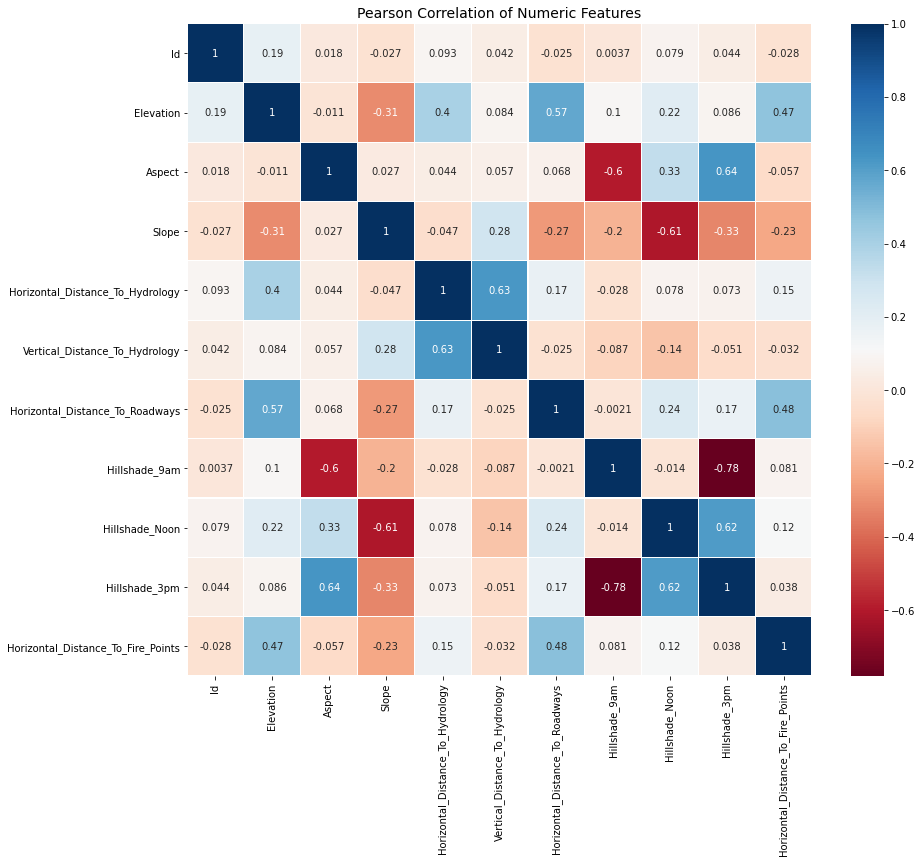

In [19]:
corr = df_viz.corr()

plt.figure(figsize = (14, 12))
colormap = plt.cm.RdBu
sns.heatmap(corr, linewidths = 0.1,
           square = False, cmap = colormap, linecolor = 'white', annot = True)
plt.title('Pearson Correlation of Numeric Features', size = 14)

In [20]:
def add_feature(data):   
    data['Ele_minus_VDtHyd'] = data.Elevation-data.Vertical_Distance_To_Hydrology
    data['Ele_plus_VDtHyd'] = data.Elevation+data.Vertical_Distance_To_Hydrology
    data['Distanse_to_Hydrolody'] = (data['Horizontal_Distance_To_Hydrology']**2+data['Vertical_Distance_To_Hydrology']**2)**0.5
    data['Hydro_plus_Fire'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Fire_Points']
    data['Hydro_minus_Fire'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Fire_Points']
    data['Hydro_plus_Road'] = data['Horizontal_Distance_To_Hydrology']+data['Horizontal_Distance_To_Roadways']
    data['Hydro_minus_Road'] = data['Horizontal_Distance_To_Hydrology']-data['Horizontal_Distance_To_Roadways']
    data['Fire_plus_Road'] = data['Horizontal_Distance_To_Fire_Points']+data['Horizontal_Distance_To_Roadways']
    data['Fire_minus_Road'] = data['Horizontal_Distance_To_Fire_Points']-data['Horizontal_Distance_To_Roadways']
    return data

In [21]:
train = add_feature(train)
test = add_feature(test)

In [22]:
X_train = train.drop(['Id','Cover_Type','soil_type','Wilderness_Area'], axis = 1)
y_train = train['Cover_Type']
X_test = test.drop(['Id'], axis = 1)

In [23]:
# lr_pipe = Pipeline(
#     steps = [
#         ('scaler', MinMaxScaler()),
#         ('classifier', LogisticRegression(solver='lbfgs', n_jobs=-1))
#     ]
# )

# lr_param_grid = {
#     'classifier__C': [1, 10, 100,1000],
# }


# np.random.seed(1)
# grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv=5, refit='True')
# grid_search.fit(X_train, y_train)

# print(grid_search.best_score_)
# print(grid_search.best_params_)

In [24]:
# rf_pipe = Pipeline(
#     steps = [
#         ('classifier', RandomForestClassifier(n_estimators = 500))
#     ]
# )

# param_grid = {
#         'classifier__min_samples_leaf': [1, 4, 7],
#         'classifier__max_depth': [34, 38, 32], 
# }

# np.random.seed(1)
# rf_grid_search = GridSearchCV(rf_pipe, param_grid, cv = 5, refit = True, n_jobs = -1)
# rf_grid_search.fit(X_train, y_train)

# print(rf_grid_search.best_score_)
# print(rf_grid_search.best_params_)

In [25]:
# rf_model = rf_grid_search.best_estimator_

# cv_score = cross_val_score(rf_model, X_train, y_train, cv = 5)
# print(cv_score)
# print('Accuracy: {:.2f} (+/- {:.2f})'.format(cv_score.mean(), cv_score.std() * 2))

In [26]:
# rf = rf_grid_search.best_estimator_.steps[0][1]

In [27]:
# feat_imp = rf.feature_importances_
# feat_imp_df = pd.DataFrame({
#     'feature': X_train.columns,
#     'feat_imp': feat_imp
# })
# feat_imp_df.sort_values(by = 'feat_imp', ascending = False).head(10)

In [28]:
# sorted_feat_imp_df = feat_imp_df.sort_values(by = 'feat_imp', ascending = False)
# plt.figure(figsize = [6, 6])
# plt.barh(sorted_feat_imp_df.feature[:20], sorted_feat_imp_df.feat_imp[:20])
# plt.show()

In [29]:
# xgd_pipe = Pipeline(
#     steps = [
#         ('classifier', XGBClassifier(n_estimators=50, subsample = 0.5))
#     ]
# )

# param_grid = {
#     'classifier__learning_rate': [0.45],
#     'classifier__min_samples_split': [8, 16, 32],
#     'classifier__min_samples_leaf': [2],
#     'classifier__max_depth': [15],
# }

# np.random.seed(1)
# xgd_grid_search = GridSearchCV(xgd_pipe, param_grid, cv = 5, refit = True, verbose = 10, n_jobs = -1)
# xgd_grid_search.fit(X_train, y_train)

In [30]:
# print(xgd_grid_search.best_score_)
# print(xgd_grid_search.best_params_)

In [31]:
# xgd_model = xgd_grid_search.best_estimator_

# cv_score = cross_val_score(xgd_model, X_train, y_train, cv = 5)
# print(cv_score)
# print('Accuracy: {:.2f} (+/- %{:.2f})'.format(cv_score.mean(), cv_score.std() * 2))

In [32]:
# from lightgbm import LGBMClassifier
# lgb_pipe = Pipeline(
#     steps = [
#         ('classifier', LGBMClassifier(n_estimators=50, subsample = 0.5))
#     ]
# )

# param_grid = {
#     'classifier__learning_rate': [0.45],
#     'classifier__min_samples_split': [8, 16, 32],
#     'classifier__min_samples_leaf': [2],
#     'classifier__max_depth': [15]
# }

# np.random.seed(1)
# lgb_grid_search = GridSearchCV(lgb_pipe, param_grid, cv = 5, refit = True, verbose = 10, n_jobs = -1)
# lgb_grid_search.fit(X_train, y_train)

# print(lgb_grid_search.best_score_)
# print(lgb_grid_search.best_params_)

In [33]:
# lgb_model = lgb_grid_search.best_estimator_

# cv_score = cross_val_score(lgb_model, X_train, y_train, cv = 5)
# print(cv_score)
# print('Accuracy: {:.2f} (+/- %{:.2f})'.format(cv_score.mean(), cv_score.std() * 2))

In [34]:
xrf_pipe = Pipeline(
    steps = [
        ('classifier', ExtraTreesClassifier(n_estimators=500,random_state=0, criterion = 'entropy'))
    ]
)


xrf_param_grid = {
    'classifier__min_samples_leaf': [1,4,7],
    'classifier__max_depth': [34,38,32],
}

np.random.seed(1)
xrf_grid_search = GridSearchCV(xrf_pipe, xrf_param_grid, cv=5, refit='True', n_jobs=-1)
xrf_grid_search.fit(X_train, y_train)

print(xrf_grid_search.best_score_)
print(xrf_grid_search.best_params_)

0.8248381859489058
{'classifier__max_depth': 38, 'classifier__min_samples_leaf': 1}


In [35]:
xrf_model = xrf_grid_search.best_estimator_

cv_score = cross_val_score(xrf_model, X_train, y_train, cv = 5)
print(cv_score)
print("Accuracy: %0.2f (+/- %0.2f)" % (cv_score.mean(), cv_score.std() * 2))

[0.82633524 0.7937521  0.78770574 0.82795699 0.88844086]
Accuracy: 0.82 (+/- 0.07)


In [40]:
final_model = xrf_grid_search.best_estimator_
final_model.fit(X_train, y_train)

Pipeline(steps=[('classifier',
                 ExtraTreesClassifier(criterion='entropy', max_depth=38,
                                      n_estimators=500, random_state=0))])

In [41]:
y_pred = final_model.predict(X_test)

In [42]:
from collections import Counter
Counter(y_pred)

Counter({2: 243215,
         5: 24877,
         1: 208749,
         7: 27470,
         3: 36898,
         6: 22708,
         4: 1975})

In [43]:
submission = pd.DataFrame({'Id': test.Id,
                           'Cover_Type': y_pred})
submission.head()

,Id,Cover_Type
0,15121,2
1,15122,2
2,15123,2
3,15124,2
4,15125,2


In [44]:
submission.to_csv('final_forest.csv', index=False)